In [56]:
# Pandas & matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files


%matplotlib inline


In [85]:
# Load CSV from Github
url = 'https://raw.githubusercontent.com/auperez/Analisis-Predictivo/main/Base%20de%20datos%20IBM.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(url)
df.head(1)
dfi=df.head(5)
dfi


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [58]:
#Checking for Null values
df.isnull().values.any()

False

In [59]:
print('Attrition:')
print(df['Attrition'].value_counts())
print('\n')
print('Business Travel:')
print(df['BusinessTravel'].value_counts())
print('\n')
print('Department:')
print(df['Department'].value_counts())
print('\n')
print('WorkLifeBalance:')
print(df['WorkLifeBalance'].value_counts())
print('\n')

print("Education:")
print(df['Education'].value_counts().sort_index(ascending=True))
print('\n')
print("Job Level:")
print(df['JobLevel'].value_counts())
print('\n')
print("Years at company:")
print( df["YearsAtCompany"].value_counts(bins=8))



Attrition:
No     1233
Yes     237
Name: Attrition, dtype: int64


Business Travel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


WorkLifeBalance:
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


Education:
1    170
2    282
3    572
4    398
5     48
Name: Education, dtype: int64


Job Level:
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


Years at company:
(-0.041, 5.0]    776
(5.0, 10.0]      448
(10.0, 15.0]     108
(15.0, 20.0]      72
(20.0, 25.0]      41
(30.0, 35.0]      12
(25.0, 30.0]       9
(35.0, 40.0]       4
Name: YearsAtCompany, dtype: int64


In [86]:
# Change str values to "string numbers" (See metadata)
df.loc[df["Attrition"] == "Yes", "Attrition"] = 1                        
df.loc[df["Attrition"] == "No", "Attrition"] = 0
#df.loc[df["BusinessTravel"] == "Travel_Rarely", "BusinessTravel"] = 1     
#df.loc[df["BusinessTravel"] == "Travel_Frequently", "BusinessTravel"] = 2                   
#df.loc[df["BusinessTravel"] == "Non-Travel", "BusinessTravel"] = 3
#df.loc[df["Department"] == "Research & Development", "Department"] = 1
#df.loc[df["Department"] == "Sales", "Department"] = 2
#df.loc[df["Department"] == "Human Resources", "Department"] = 3
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [61]:
#Eliminate columns:
# 'Over18' (everyone is >18), column "StandardHours" ( all values = 80 and column "EmployeeCount" is not needed as there is already an index


del df["Over18"]
del df['EmployeeCount']
del df['StandardHours']
df.head(1)
del dfi["Over18"]
del dfi['EmployeeCount']
del dfi['StandardHours']
dfi


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [62]:
#Looking for outliers
def plot_boxplot(dfr,col):
  dfr.boxplot(column=[col])
  plt.show()

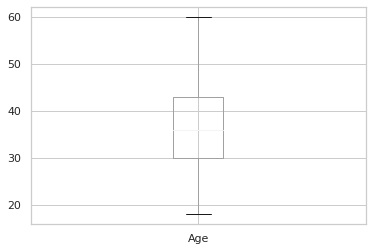

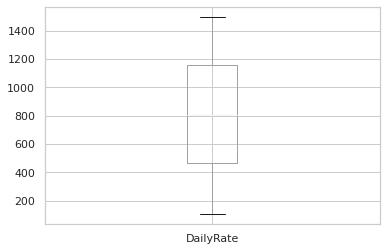

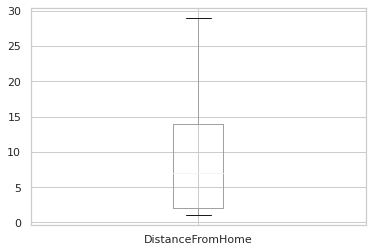

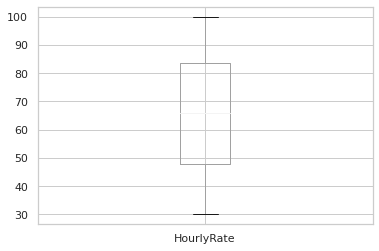

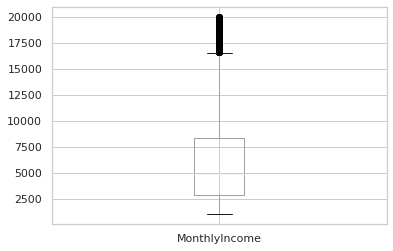

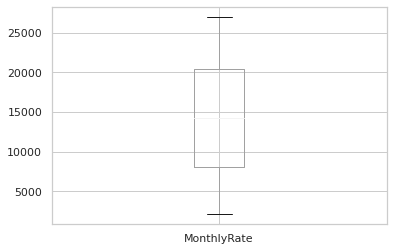

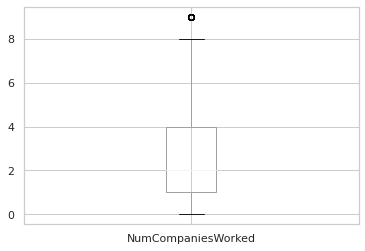

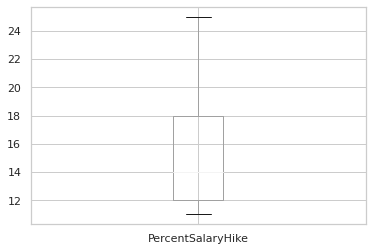

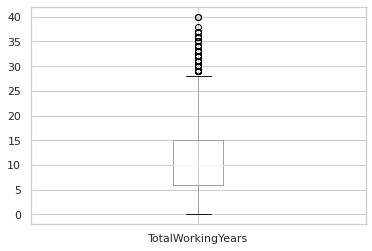

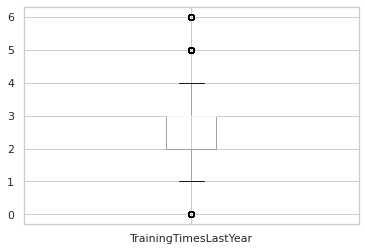

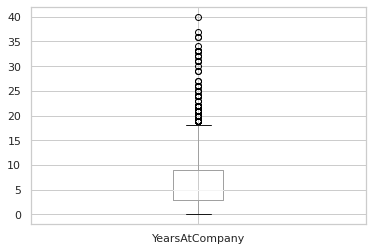

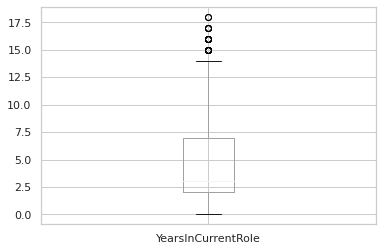

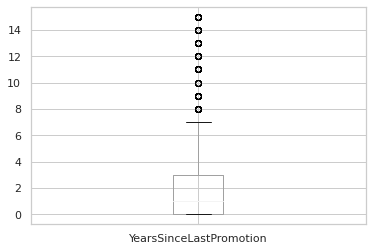

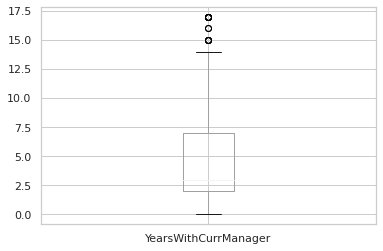

In [63]:
plot_boxplot(df,"Age")
plot_boxplot(df,'DailyRate')
plot_boxplot(df,"DistanceFromHome")
plot_boxplot(df,"HourlyRate")
plot_boxplot(df,"MonthlyIncome") #Has outliers
plot_boxplot(df,"MonthlyRate")
plot_boxplot(df,"NumCompaniesWorked") #Has outliers
plot_boxplot(df,"PercentSalaryHike")
plot_boxplot(df,"TotalWorkingYears") #Has outliers
plot_boxplot(df,"TrainingTimesLastYear") #Has outliers
plot_boxplot(df,"YearsAtCompany") #Has outliers
plot_boxplot(df,"YearsInCurrentRole") #Has outliers
plot_boxplot(df,"YearsSinceLastPromotion") #Has outliers
plot_boxplot(df,"YearsWithCurrManager") #Has outliers

In [64]:
#Create outliers function

def outliers(df, col):
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR= Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  ls = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]
  return ls



In [65]:
#Create index list with all the rows that have outliers

index_list=[]
for col in ["MonthlyIncome","NumCompaniesWorked","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion","YearsWithCurrManager"]:
  index_list.extend(outliers(df,col))


In [66]:
#Check for duplicates
def remove(df,ls):
  ls=sorted((set(ls)))
  df = df.drop(ls)
  return df

The number of rows where MonthlyIncome is > 16581 are:  114
First 5 values in order: 
466     16595
1043    16598
1080    16606
489     16627
379     16659
Name: MonthlyIncome, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a1c6ed4d0>]],
      dtype=object)

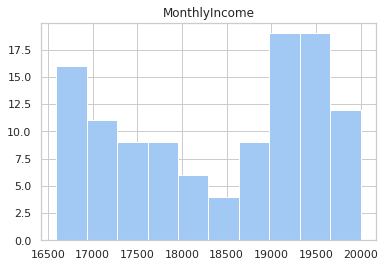

In [67]:
df["MonthlyIncome"].describe()
column=df["MonthlyIncome"]
print("The number of rows where MonthlyIncome is > 16581 are: ", column[column>16581].count()) # Q3+1.5*(IQR)=16581
Monthlyincomeout=df[df.MonthlyIncome>16581] 
Monthlyincomeout=Monthlyincomeout.sort_values(by=["MonthlyIncome"], ascending=True)
print("First 5 values in order: ")
print(Monthlyincomeout["MonthlyIncome"].head())
#print("\nValues ordered by deciles: ")
#print(Monthlyincomeout['MonthlyIncome'].value_counts(bins=10, sort=False))
Monthlyincomeout.hist(column='MonthlyIncome',bins=10)


In [68]:
#Rearranging columns
df = df[['Attrition', 'Age', 'Gender', 'MaritalStatus', 'NumCompaniesWorked', 'TotalWorkingYears', 'BusinessTravel', 'DistanceFromHome', 'Department', 'Education', 'EducationField',   'HourlyRate', 'DailyRate', 'MonthlyRate', 'MonthlyIncome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
df.head(3)

,Attrition,Age,Gender,MaritalStatus,NumCompaniesWorked,TotalWorkingYears,BusinessTravel,DistanceFromHome,Department,Education,EducationField,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Female,Single,8,8,1,1,Sales,2,Life Sciences,94,1102,19479,5993,2,3,2,Sales Executive,4,Yes,11,3,1,0,1,6,4,0,5
1,0,49,Male,Married,1,10,2,8,Research & Development,1,Life Sciences,61,279,24907,5130,3,2,2,Research Scientist,2,No,23,4,4,3,3,10,7,1,7
2,1,37,Male,Single,6,7,1,2,Research & Development,2,Other,92,1373,2396,2090,4,2,1,Laboratory Technician,3,Yes,15,3,2,3,3,0,0,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    1470.000000
mean       13.550340
std         8.793206
min         1.000000
25%         7.000000
50%        12.000000
75%        18.000000
max        50.000000
Name: HoursWorked, dtype: float64


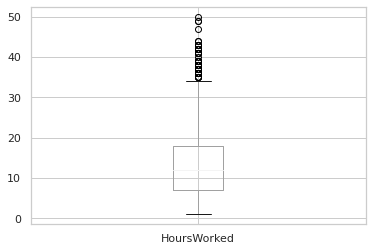

434


In [69]:
#Seing if there is any relation between HourlyRate and DailyRate
df["HoursWorked"] = np.where(df["HourlyRate"] != 0, df["DailyRate"]/df["HourlyRate"],0)
df["HoursWorked"]=df["HoursWorked"].round(0)
print(df["HoursWorked"].describe())
plot_boxplot(df,"HoursWorked")
details = df.apply(lambda x : True
            if x['HoursWorked'] > 16 else False, axis = 1)
num_rows = len(details[details == True].index)
print(num_rows)
del df["HoursWorked"]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   MaritalStatus             1470 non-null   object
 4   NumCompaniesWorked        1470 non-null   int64 
 5   TotalWorkingYears         1470 non-null   int64 
 6   BusinessTravel            1470 non-null   object
 7   DistanceFromHome          1470 non-null   int64 
 8   Department                1470 non-null   object
 9   Education                 1470 non-null   int64 
 10  EducationField            1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  DailyRate                 1470 non-null   int64 
 13  MonthlyRate               1470 non-null   int64 
 14  MonthlyIncome           

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


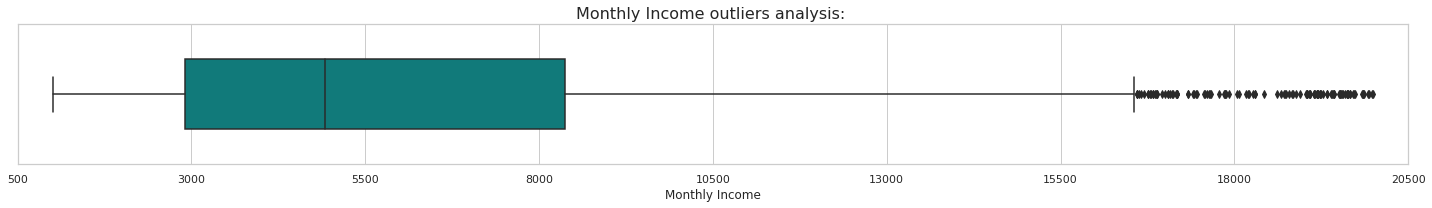

In [71]:
fig, ax = plt.subplots(figsize=(20,3))
sns.boxplot(df['MonthlyIncome'],color="darkcyan",width=.5)
print(df["MonthlyIncome"].describe())
plt.title("Monthly Income outliers analysis: ",fontsize=16)
plt.xlabel("Monthly Income")
plt.xlim([900,20501])
plt.xticks(np.arange(500,20501,2500))
plt.tight_layout()

plt.savefig("abc.jpeg")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

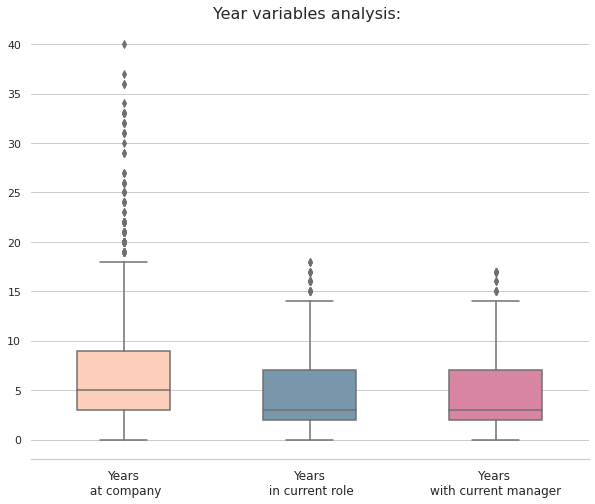

In [72]:
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(10,8))
g= sns.boxplot(data=df[["YearsAtCompany",'YearsInCurrentRole','YearsWithCurrManager']],width=.5)
plt.title("Year variables analysis: ",fontsize=16)
xvalues=["Years\n at company","Years\n in current role","Years \nwith current manager"]
plt.xticks(np.arange(3),xvalues,fontsize=12)
sns.despine(top=True,right=True, left=True,bottom=False)
palette= ['#FDCEB9','#7897AB','#D885A3']
color_dict = dict(zip(xvalues, palette))
for i in range(0,3):
    mybox = g.artists[i]
    mybox.set_facecolor(color_dict[xvalues[i]])
plt.savefig("BoxplotYears.jpeg")
files.download("BoxplotYears.jpeg")
plt.show()

In [73]:
df.corr()

,Age,NumCompaniesWorked,TotalWorkingYears,DistanceFromHome,Education,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.299635,0.680381,-0.001686,0.208034,0.024287,0.010661,0.028051,0.497855,0.010146,0.029820,0.509604,-0.004892,0.003634,0.001904,0.053535,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
NumCompaniesWorked,0.299635,1.000000,0.237639,-0.029251,0.126317,0.022157,0.038153,0.017521,0.149515,0.012594,0.015012,0.142501,-0.055699,-0.010238,-0.014095,0.052733,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319
TotalWorkingYears,0.680381,0.237639,1.000000,0.004628,0.148280,-0.002334,0.014515,0.026442,0.772893,-0.002693,-0.005533,0.782208,-0.020185,-0.020608,0.006744,0.024054,-0.035662,0.001008,0.628133,0.460365,0.404858,0.459188
DistanceFromHome,-0.001686,-0.029251,0.004628,1.000000,0.021042,0.031131,-0.004985,0.027473,-0.017014,-0.016075,0.008783,0.005303,-0.003669,0.040235,0.027110,0.006557,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.126317,0.148280,0.021042,1.000000,0.016775,-0.016806,-0.026084,0.094961,-0.027128,0.042438,0.101589,-0.011296,-0.011111,-0.024539,-0.009118,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
HourlyRate,0.024287,0.022157,-0.002334,0.031131,0.016775,1.000000,0.023381,-0.015297,-0.015794,-0.049857,0.042861,-0.027853,-0.071335,-0.009062,-0.002172,0.001330,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
DailyRate,0.010661,0.038153,0.014515,-0.004985,-0.016806,0.023381,1.000000,-0.032182,0.007707,0.018355,0.046135,0.002966,0.030571,0.022704,0.000473,0.007846,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
MonthlyRate,0.028051,0.017521,0.026442,0.027473,-0.026084,-0.015297,-0.032182,1.000000,0.034814,0.037600,-0.016322,0.039563,0.000644,-0.006429,-0.009811,-0.004085,0.001467,0.007963,-0.023655,-0.012815,0.001567,-0.036746
MonthlyIncome,0.497855,0.149515,0.772893,-0.017014,0.094961,-0.015794,0.007707,0.034814,1.000000,-0.006259,-0.015271,0.950300,-0.007157,-0.027269,-0.017120,0.025873,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079
EnvironmentSatisfaction,0.010146,0.012594,-0.002693,-0.016075,-0.027128,-0.049857,0.018355,0.037600,-0.006259,1.000000,-0.008278,0.001212,-0.006784,-0.031701,-0.029548,0.007665,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


In [74]:
mask=np.zeros_like(df.corr())
tri_indices=np.triu_indices_from(mask)
mask[tri_indices]=True


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

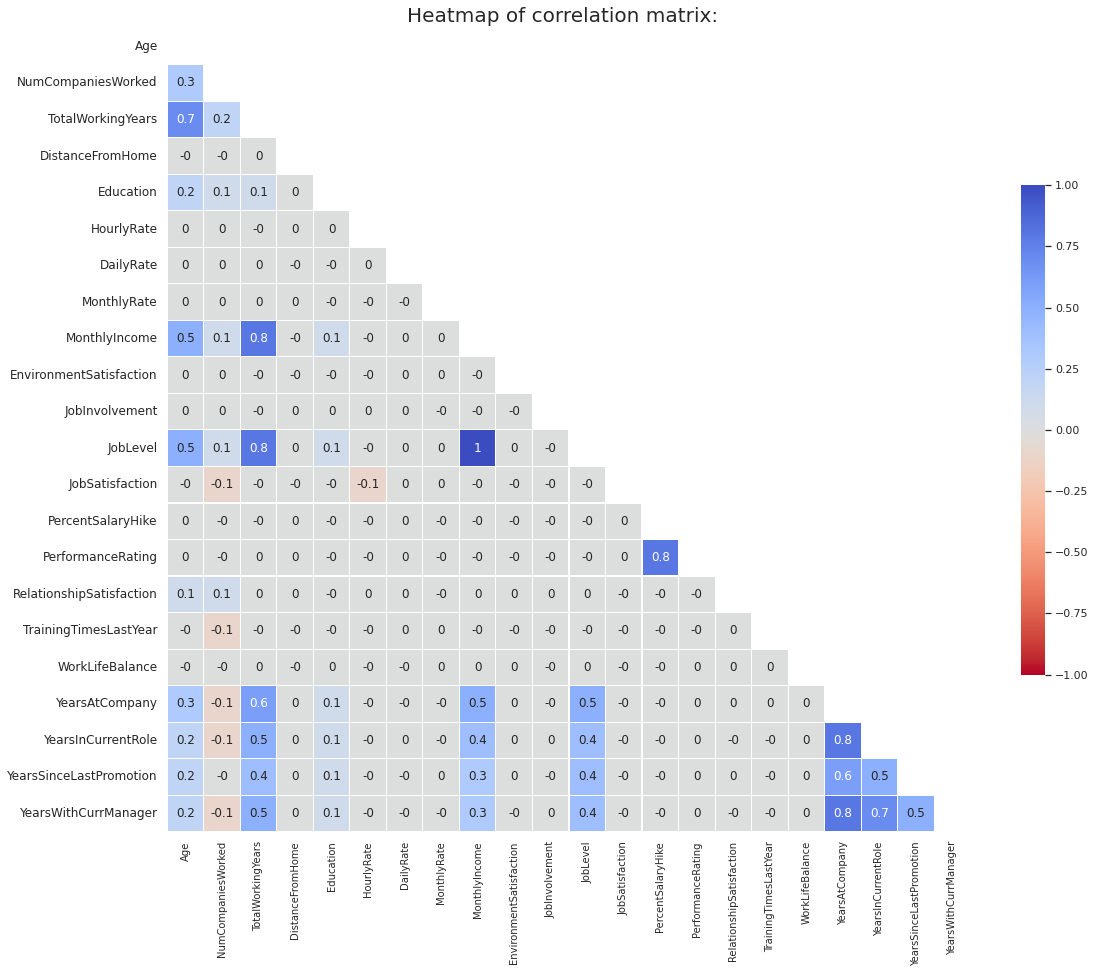

In [75]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr().round(1),mask=mask, cmap="coolwarm_r",annot=True,square=True,linewidths=.1,vmin=-1,vmax=1,annot_kws={"size": 12},cbar_kws={"shrink": 0.5})
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.title("Heatmap of correlation matrix:  ",fontsize=20)
plt.savefig("HeatmapCorr.jpeg")
files.download("HeatmapCorr.jpeg")
plt.show()

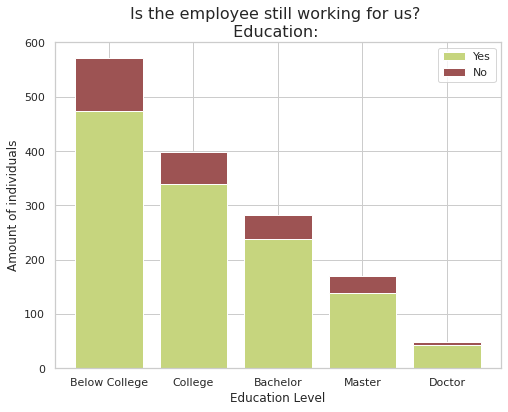

In [76]:
x=['Below College','College','Bachelor','Master','Doctor']
yes = df['Education'].where(df["Attrition"]==1).value_counts()
no = df['Education'].where(df["Attrition"]==0).value_counts()

plt.figure(figsize=(8,6))
plt.bar(x,no,label="Yes",color="#C6D57E")
plt.bar(x,yes,bottom=no,label="No",color="#9D5353")
plt.title("Is the employee still working for us? \n Education:  ",fontsize=16)
plt.xlabel("Education Level")
plt.ylabel("Amount of individuals")
plt.legend()
#plt.savefig("Educationtotal.jpeg")
#files.download("Educationtotal.jpeg")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

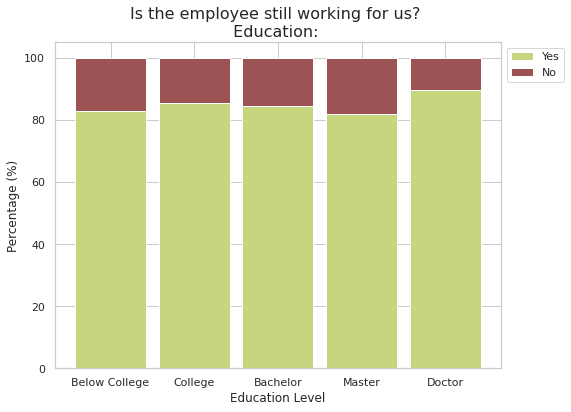

In [77]:
plt.figure(figsize=(8,6))
r = ['Below College','College','Bachelor','Master','Doctor']
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['Education'].where(df["Attrition"]==1).value_counts(), df['Education'].where(df["Attrition"]==0).value_counts())]
yes = [i / j * 100 for i,j in zip(df['Education'].where(df["Attrition"]==1).value_counts(), totals)]
no = [i / j * 100 for i,j in zip(df['Education'].where(df["Attrition"]==0).value_counts(), totals)]

 
# plot
barWidth = 0.85
names = ('Below College','College','Bachelor','Master','Doctor')
plt.bar(r, no, color='#C6D57E', edgecolor='white', width=barWidth, label="Yes")
plt.bar(r, yes, bottom=no, color='#9D5353', edgecolor='white', width=barWidth, label="No")
plt.xticks(r, names)
plt.title("Is the employee still working for us? \n Education:  ",fontsize=16)
plt.xlabel("Education Level")
plt.ylabel("Percentage (%)")
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.savefig("EducationRelative.jpeg")
files.download("EducationRelative.jpeg")
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

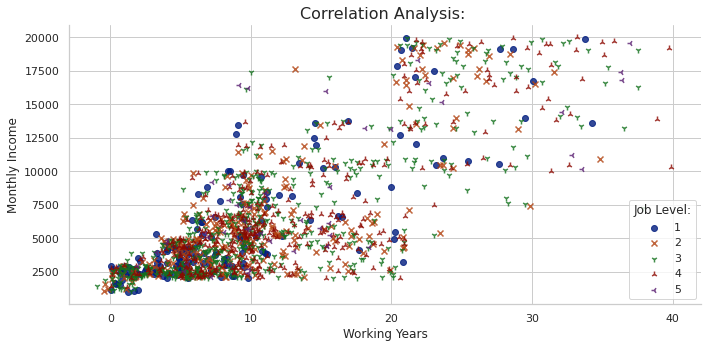

In [78]:
sns.lmplot( x="TotalWorkingYears", y="MonthlyIncome", data=df, fit_reg=False, hue='Education', legend=False,palette="dark",x_jitter=1, height=5, aspect=2,markers=["o", "x", "1","2","3"])
plt.xlabel("Working Years")
plt.ylabel("Monthly Income")
plt.title("Correlation Analysis: ",fontsize=16)
plt.legend(title="Job Level:",loc='lower right')
plt.tight_layout()
plt.savefig("WorkIncomecorrelation.jpeg")
files.download("WorkIncomecorrelation.jpeg")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

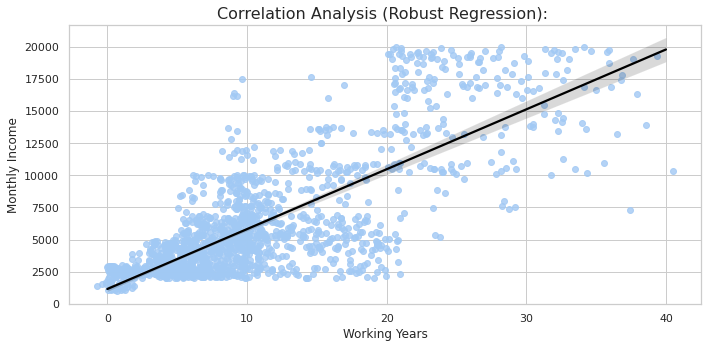

In [79]:
plt.figure(figsize=(10,5))
sns.regplot( x="TotalWorkingYears", y="MonthlyIncome", x_jitter=1, data=df,robust=True,line_kws={"color": "black"})
plt.xlabel("Working Years")
plt.ylabel("Monthly Income")
plt.title("Correlation Analysis (Robust Regression): ",fontsize=16)
plt.tight_layout()

plt.savefig("WorkIncomecorrelationRobust.jpeg")
files.download("WorkIncomecorrelationRobust.jpeg")

plt.show()

EnvironmentSatisfaction  Department            
1                        Human Resources            4
                         Research & Development    43
                         Sales                     25
2                        Human Resources            3
                         Research & Development    18
                         Sales                     22
3                        Human Resources            2
                         Research & Development    38
                         Sales                     22
4                        Human Resources            3
                         Research & Development    34
                         Sales                     23
dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

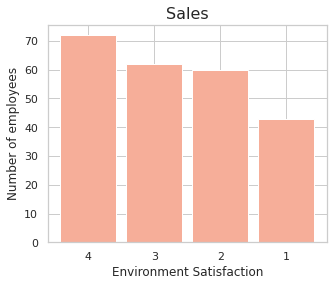

In [80]:
x=['4','3','2','1']
plt.figure(figsize=(5,4))
dfg=df.loc[(df["Attrition"]==1),["Department","EnvironmentSatisfaction",]]
res= dfg["EnvironmentSatisfaction"].value_counts()

print(dfg.groupby(["EnvironmentSatisfaction","Department" ]).size())


plt.xlabel("Environment Satisfaction")
plt.ylabel("Number of employees")
plt.title("Sales", fontsize=16)
plt.bar(x, res, color='#F6AE99', edgecolor='white', width=barWidth, label="Yes")
plt.savefig("EnvSat1.jpeg")
files.download("EnvSat1.jpeg")

plt.show()


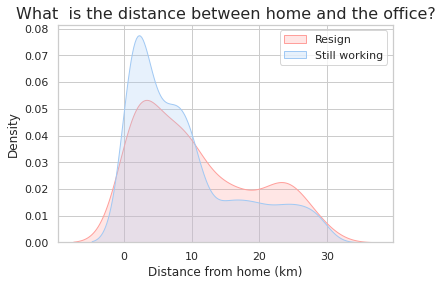

Data for those that have resigned: 
Median: 9.0
count    237.000000
mean      10.632911
std        8.452525
min        1.000000
25%        3.000000
50%        9.000000
75%       17.000000
max       29.000000
Name: DistanceFromHome, dtype: float64
Data for those that are still working with us: 
Median: 7.0


count    1233.000000
mean        8.915653
std         8.012633
min         1.000000
25%         2.000000
50%         7.000000
75%        13.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [83]:
plt.figure(figsize=(6,4))
fig = sns.kdeplot(df['DistanceFromHome'].where(df["Attrition"]==1), shade=True, color="r",label="Resign")
fig = sns.kdeplot(df['DistanceFromHome'].where(df["Attrition"]==0), shade=True, color="b",label="Still working")
plt.xlabel("Distance from home (km)")
plt.title("What  is the distance between home and the office?",fontsize=16)
plt.legend()
plt.show()
#plt.savefig("DistanceDensity.jpeg")
#files.download("DistanceDensity.jpeg")
print("Data for those that have resigned: ")
print("Median:",df['DistanceFromHome'].where(df["Attrition"]==1).median())
print(df['DistanceFromHome'].where(df["Attrition"]==1).describe())
print("Data for those that are still working with us: ")
print("Median:",df['DistanceFromHome'].where(df["Attrition"]==0).median())
df['DistanceFromHome'].where(df["Attrition"]==0).describe()


In [87]:
print(df.groupby(["BusinessTravel","Attrition" ]).size())

BusinessTravel     Attrition
Non-Travel         0            138
                   1             12
Travel_Frequently  0            208
                   1             69
Travel_Rarely      0            887
                   1            156
dtype: int64
